In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove useless features

In [3]:
titanic_data_update = titanic_data.drop(["PassengerId", "Name", "Ticket"], axis=1)
titanic_data_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Review of data

In [4]:
print(f"Shape of dataset: {len(titanic_data_update)} rows x {len(titanic_data_update.columns)} columns")

Shape of dataset: 891 rows x 9 columns


In [5]:
print("Missing values in dataset: ")
print(titanic_data_update.isnull().sum())

Missing values in dataset: 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


/tmp/ipykernel_34/1305224952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_data_update.corr()


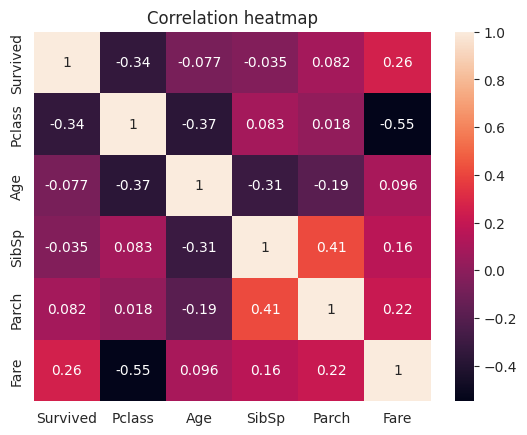

In [19]:
corr = titanic_data_update.corr()
plt.title("Correlation heatmap")
_ = sns.heatmap(corr, cmap="rocket", annot=True)

As we see the most correlated feature to Survived is Fare.

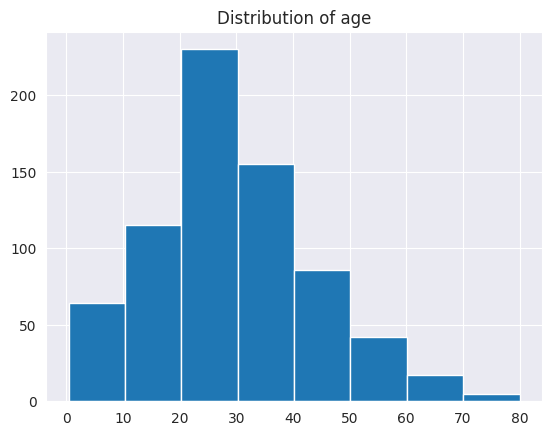

In [30]:
plt.title("Distribution of age")
_ = plt.hist(titanic_data_update["Age"], bins=8)

Majority of passengers age is between 10 and 50.

In [26]:
print(f"The oldest person was {np.max(titanic_data_update['Age'])}")

The oldest person was 80.0


In [27]:
print(f"The youngest person was {np.min(titanic_data_update['Age'])}")

The youngest person was 0.42


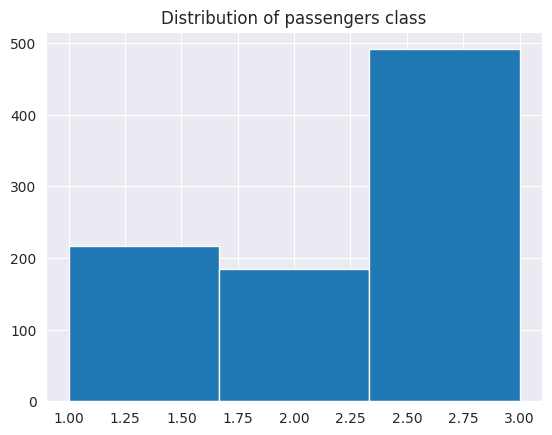

In [29]:
plt.title("Distribution of passengers class")
_ = plt.hist(titanic_data_update["Pclass"], bins=3)

The most of passengers was in third class.

## Preparing data before training

### Remove missing values in age

In [32]:
print(f"Missing values in Age: {titanic_data_update['Age'].isnull().sum()}")

Missing values in Age: 177


In [33]:
titanic_data_update["Age"].fillna(np.mean(titanic_data_update["Age"]), inplace=True)

In [34]:
print(f"Missing values in Age: {titanic_data_update['Age'].isnull().sum()}")

Missing values in Age: 0


We have filled in the missing values with the average

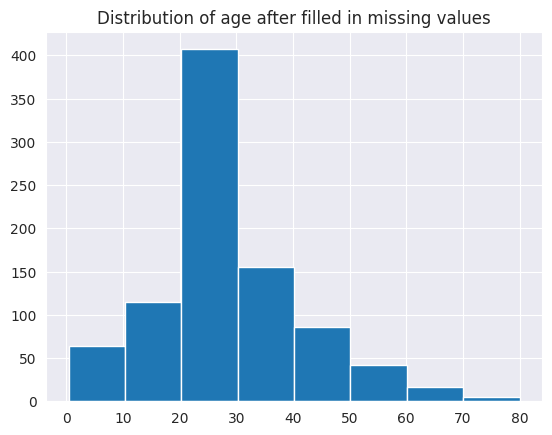

In [46]:
plt.title("Distribution of age after filled in missing values")
_ = plt.hist(titanic_data_update["Age"], bins=8)

### Remove missing values in cabin

In [37]:
print(f"Missing values in Cabin: {titanic_data_update['Cabin'].isnull().sum()}")

Missing values in Cabin: 687


In [45]:
print(f"Missing values in Cabin: {round(titanic_data_update['Cabin'].isnull().sum()/ len(titanic_data_update['Cabin']),2) * 100}%")

Missing values in Cabin: 77.0%


In this feature a 77% values is missing. To fill in missing values we should create a new class.

In [47]:
print(f"Type of cabins: {titanic_data_update['Cabin'].unique()}")

Type of cabins: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [48]:
titanic_data_update["Cabin"].fillna("M", inplace=True)

In [49]:
print(f"Missing values in Cabin: {titanic_data_update['Cabin'].isnull().sum()}")

Missing values in Cabin: 0


### Remove missing values in Embarked

In [50]:
print(f"Missing values in Embarked: {titanic_data_update['Embarked'].isnull().sum()}")

Missing values in Embarked: 2


In [52]:
from collections import Counter

count = Counter(titanic_data_update['Embarked'])
print(count)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [53]:
titanic_data_update["Embarked"].fillna("S", inplace=True)

In [54]:
print(f"Missing values in Embarked: {titanic_data_update['Embarked'].isnull().sum()}")

Missing values in Embarked: 0


In [55]:
print("Missing values in dataset: ")
print(titanic_data_update.isnull().sum())

Missing values in dataset: 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


As we see all of missing values we filled in.